In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs') 
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\keerthi\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import seaborn as sns 

In [4]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

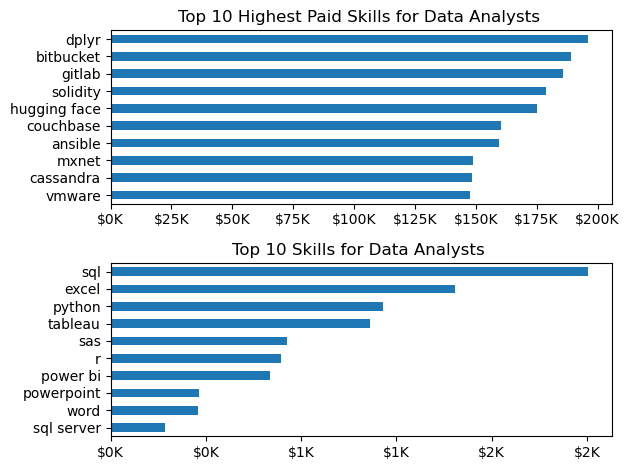

In [5]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']]

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)
df_DA_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10)

df_DA_skills

fig,ax = plt.subplots(2,1)

df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts ')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

df_DA_skills[::-1].plot(kind='barh', y='count', ax=ax[1],legend=False)
ax[1].set_title('Top 10 Skills for Data Analysts ')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

fig.tight_layout()


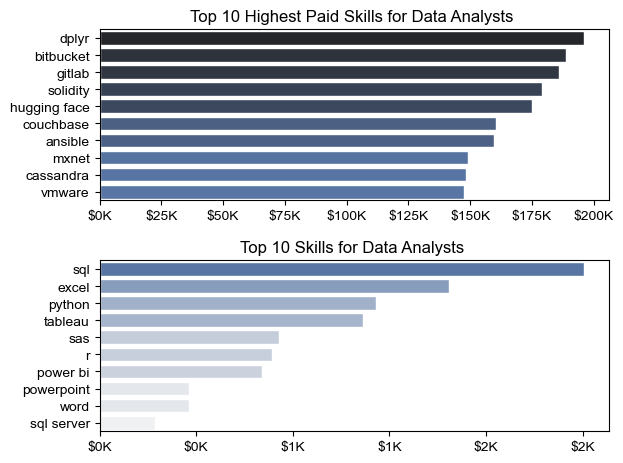

In [6]:
fig,ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay,x='median',y=df_DA_top_pay.index, ax=ax[0],hue='median',palette='dark:b_r')
ax[0].legend().remove()

#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0],legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts ')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills,x='count',y=df_DA_skills.index, ax=ax[1],hue='count',palette='light:b')
ax[1].legend().remove()

#df_DA_skills[::-1].plot(kind='barh', y='count', ax=ax[1],legend=False)
ax[1].set_title('Top 10 Skills for Data Analysts ')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))

fig.tight_layout()

Text(0, 0.5, 'No of jobs posted')

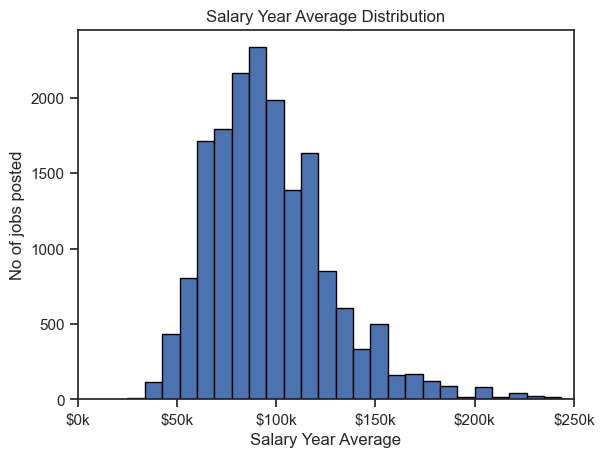

In [7]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins = 40,edgecolor='black')
plt.xlim(0,250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}k'))
plt.title('Salary Year Average Distribution')
plt.xlabel('Salary Year Average')
plt.ylabel('No of jobs posted')

Text(12.444444444444445, 0.5, 'No of jobs posted')

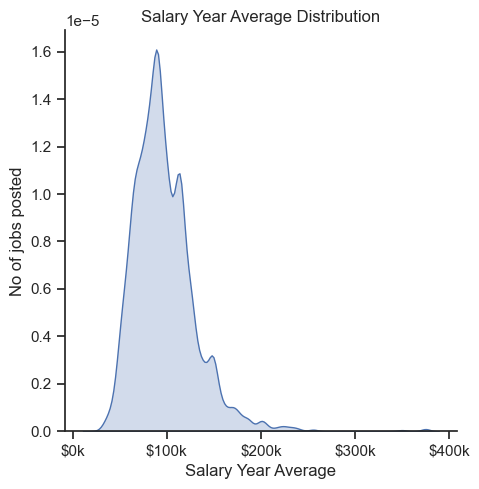

In [11]:
# df_DA_US['salary_year_avg'].plot(kind='hist',bins = 40,edgecolor='black')
#plt.xlim(0,250000)
sns.displot(df_DA_US['salary_year_avg'],kind='kde',fill = True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}k'))
plt.title('Salary Year Average Distribution')
plt.xlabel('Salary Year Average')
plt.ylabel('No of jobs posted')

C:\Users\keerthi\AppData\Local\Temp\ipykernel_20704\2705953960.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


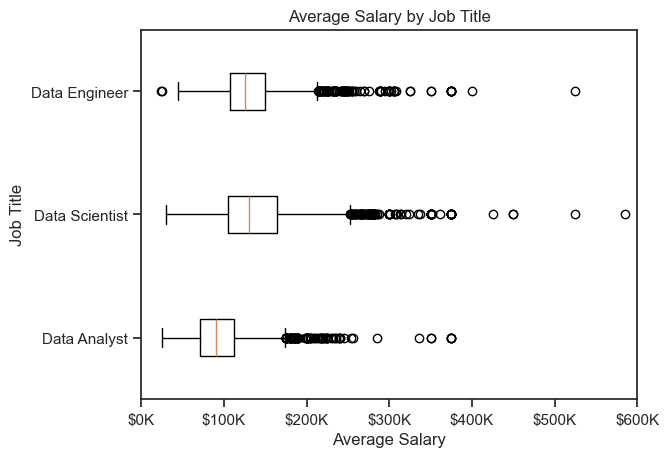

In [12]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer',]
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']== 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_titles]['salary_year_avg'] for job_titles in job_titles]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

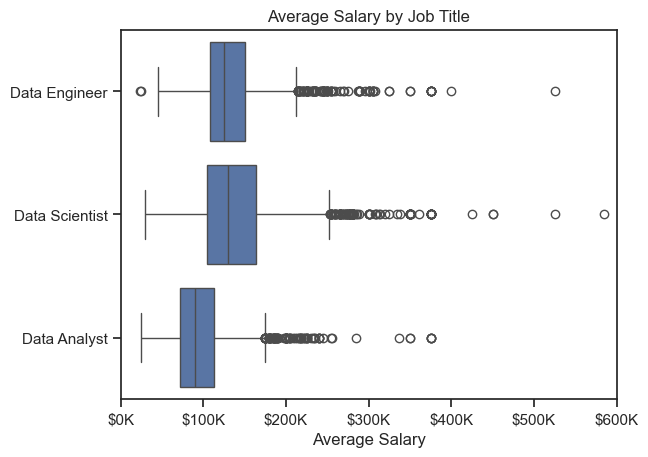

In [14]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
plt.xlabel('Average Salary')
plt.ylabel('')
plt.title('Average Salary by Job Title')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()